In [1]:
import pandas as pd
import numpy as np

/Users/mahiradayal/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df = pd.read_csv("contacttracejobs.csv")
df.shape

(876, 6)

In [3]:
df.head()

,Job Title,Job Company,Job Location,Job Type,Job Pay,Job Excerpt
0,Urgent Need for Contact Tracer,Staffing Etc.,Not specified,Temporarily remote,$25 an hour,\n\nThe Contact Tracer will work from home usi...
1,Representantes Bilingues en Ingles y Espanol C...,ValorVIP,Not specified,Not remote,Pay details not available,\n\nComplete research of beneficiary contact h...
2,Representantes Bilingues en Ingles y Espanol C...,MCI Careers,Not specified,Not remote,Pay details not available,\n\nComplete research of beneficiary contact h...
3,COVID-19 Contact Tracer,New Healthcare Professionals,"Jamaica, NY",Not remote,$18 - $20 an hour,\n\nPerforms outreach in support of COVID-19 c...
4,Contact Tracer,Public Consulting Group,"New York, NY 10038 (Financial District area)",Remote,Pay details not available,\n\nCall contacts of newly diagnosed cases.\nT...


In [4]:
df_locations = df[(df['Job Location'] != "Not specified") & (df['Job Location'] != "Remote")]

In [5]:
df_locations.shape

(793, 6)

In [6]:
df_locations['Job Location'].value_counts().sort_values(ascending=False).head()

Street, MD           160
Arkansas              34
Menasha, WI 54952     31
Chicago, IL           31
Holland, MI 49424     26
Name: Job Location, dtype: int64

In [7]:
df_locations['Job State'] = df_locations['Job Location'].str.contains(r"(, \w\w)\w?\w*", na = False)

for state in df_locations['Job State']:
    if state == True:
        df_locations['Job State'] = df_locations['Job Location'].str.extract(r", (\w\w)\w?\w*", expand=True)


/Users/mahiradayal/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
<ipython-input-7-c51fe258b2a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_locations['Job State'] = df_locations['Job Location'].str.contains(r"(, \w\w)\w?\w*", na = False)
<ipython-input-7-c51fe258b2a2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_locations['Job State'] =

In [8]:
df_locations[df_locations['Job State'].isna()]['Job Location'].value_counts()

Arkansas            34
Alaska              11
California           6
Wisconsin            5
New Jersey           4
Georgia              3
Massachusetts        2
Pennsylvania         2
South Dakota         1
Colorado             1
Louisiana            1
Indiana              1
Iowa                 1
Utah                 1
Texas                1
Washington State     1
Nebraska             1
Nevada               1
Missouri             1
Puerto Rico          1
Name: Job Location, dtype: int64

In [9]:
# Disclaimer, I copied this dictionary from the internet and edited Washington to Washington State to match my data. 
# Here's where it's from: https://gist.github.com/rogerallen/1583593?fbclid=IwAR10dikMqEqCda310-F3T2RCARIY4Ng3XtYMu95fiira2dDaUdm7Yt8icls

state_mapping = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington State': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'}

for state in state_mapping.keys():
    df_locations.loc[df_locations['Job Location'] == state, 'Job State'] = state_mapping[state]

/Users/mahiradayal/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-9-9d964bdc3512>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_locations.loc[df_locations['Job Location'] == state, 'Job State'] = state_mapping[state]


In [10]:
df_locations.head()

,Job Title,Job Company,Job Location,Job Type,Job Pay,Job Excerpt,Job State
3,COVID-19 Contact Tracer,New Healthcare Professionals,"Jamaica, NY",Not remote,$18 - $20 an hour,\n\nPerforms outreach in support of COVID-19 c...,NY
4,Contact Tracer,Public Consulting Group,"New York, NY 10038 (Financial District area)",Remote,Pay details not available,\n\nCall contacts of newly diagnosed cases.\nT...,NY
5,Contact Tracer,MIC Global Services,"Plano, TX 75024",Temporarily remote,$20 - $25 an hour,\n\nContact tracers will follow a script to in...,TX
7,Contact Tracer,Southern Nevada Health District,Nevada,Remote,$22.03 - $30.75 an hour,\n\nProvides contacts with regulated informati...,NV
8,"Covid-19 Contact Tracer/Survey Interviewer, Fu...","Professional Research Consultants, Inc",South Dakota,Temporarily remote,Pay details not available,\n\nMaintain daily contact with supervisor.\nT...,SD


In [11]:
df_locations[df_locations['Job State'].isna()].count()

Job Title       0
Job Company     0
Job Location    0
Job Type        0
Job Pay         0
Job Excerpt     0
Job State       0
dtype: int64

<AxesSubplot:ylabel='Job Type'>

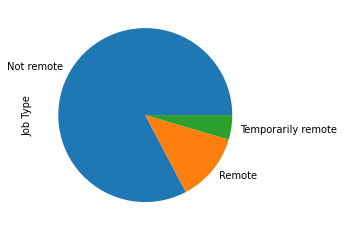

In [12]:
df_locations['Job Type'].value_counts().plot(kind = 'pie')

<AxesSubplot:>

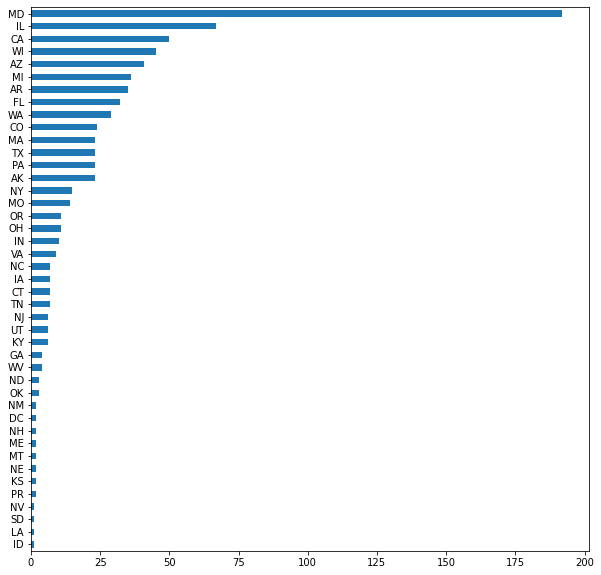

In [20]:
df_locations['Job State'].value_counts().sort_values().plot(kind='barh', figsize=(10,10))

In [14]:
df_locations['Job State'].value_counts().sort_values(ascending=False).head(1)

MD    192
Name: Job State, dtype: int64

In [15]:
df_locations['Job Company'].value_counts().sort_values(ascending=False).head(20)

City of Baltimore                        160
Arkansas Foundation for Medical Care      34
City of Menasha                           31
Ottawa County                             26
Mohave County                             25
US Department of Veterans Affairs         24
Cook County Health & Hospitals System     23
AM LLC                                    22
City of Baltimore, MD                     18
Columbine Health Systems                  17
HPM Corporation                           15
Crane Elementary School District 13       10
Heluna Health                             10
Public Consulting Group                    7
Shelby County Government                   6
Southern Seven Health Department           5
Public Health Institute                    5
Indiana University                         5
LifeLong Medical Care                      4
State of Maryland                          4
Name: Job Company, dtype: int64

In [16]:
df_locations[df_locations['Job Company'] == "City of Baltimore"]

,Job Title,Job Company,Job Location,Job Type,Job Pay,Job Excerpt,Job State
443,COVID-19 Disease Reactor Coordinator - Health ...,City of Baltimore,"Street, MD",Not remote,Pay details not available,\n\nThis includes coordinating between case in...,MD
446,Project Director - Health Department,City of Baltimore,"Street, MD",Not remote,"$80,000 a year",\n\nThese managers will oversee supervisors of...,MD
457,Partner Coordinator - Health Department,City of Baltimore,"Street, MD",Not remote,Pay details not available,\n\nMaintain communication with partners and e...,MD
462,Community Health Worker/ Data Coordinator - He...,City of Baltimore,"Street, MD",Not remote,"$55,000 a year",\n\nKey duties & responsibilities Data Collect...,MD
466,Social Work Care Coordinator - Health Department,City of Baltimore,"Street, MD",Not remote,"$55,000 a year",\n\nApplicants who are hired for this position...,MD
...,...,...,...,...,...,...,...
868,Community Health Worker/ Data Coordinator - He...,City of Baltimore,"Street, MD",Not remote,"$55,000 a year",\n\nKey duties & responsibilities Data Collect...,MD
869,Social Work Care Coordinator - Health Department,City of Baltimore,"Street, MD",Not remote,"$55,000 a year",\n\nApplicants who are hired for this position...,MD
870,Community Health Worker / Care Coordinator - H...,City of Baltimore,"Street, MD",Not remote,"$39,000 a year",\n\nApplicants hired for this position will un...,MD
871,Conversion and Care Coordination Manager - Hea...,City of Baltimore,"Street, MD",Not remote,Pay details not available,\n\nThis includes managing a team of Disease R...,MD


### Things I could integrate: 
COVID data per state: https://github.com/jeffcore/covid-19-usa-by-state/tree/master/data
(Or scrape this directly from John Hopkins)
